In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import metrics
import math
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

# Leitura do dataset

In [2]:
dim = 128
dataset = pd.read_csv('./health-dataset/word2vec.csv', names = [i for i in range(dim)])

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.013595,-0.068772,-0.013126,0.006024,0.037922,-0.020872,-0.010325,0.008019,0.008064,0.011381,...,-0.020965,0.062473,-0.000060,-0.062621,-0.019586,0.046007,0.003811,0.011133,-0.040208,-0.041968
1,0.025009,-0.025586,0.012237,0.020567,0.014523,-0.018705,-0.058395,0.028054,-0.032362,0.020582,...,-0.034977,0.030475,0.038899,0.016926,-0.000666,0.007311,0.001348,0.008414,-0.013927,0.002399
2,0.031544,-0.025882,-0.060617,0.035992,0.037742,-0.021132,-0.041023,0.011076,0.003247,0.014427,...,-0.000146,0.000293,0.029334,-0.005735,-0.025683,0.028694,0.028692,0.049043,-0.011250,-0.029423
3,0.058714,-0.080251,-0.026101,0.060461,0.016714,-0.005205,-0.037441,0.051472,-0.063505,0.003247,...,-0.021879,0.017103,0.016472,-0.004953,-0.001521,-0.018822,0.020216,0.025708,-0.016543,0.012973
4,0.023366,-0.065667,-0.015601,0.022602,0.030365,-0.060590,-0.071055,-0.008641,-0.018728,0.042880,...,0.014219,0.051613,0.027316,-0.030006,-0.028209,0.064256,-0.019291,0.003725,-0.049937,-0.015975


# Função para remoção de outliers

In [4]:
def remove_outliers(arr, k):
    mu, sigma = np.mean(arr, axis=0), np.std(arr, axis=0, ddof=1)
    return arr[np.all(np.abs((arr - mu) / sigma) < k, axis=1)]

In [5]:
dataset = remove_outliers(dataset,2)

In [6]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.013595,-0.068772,-0.013126,0.006024,0.037922,-0.020872,-0.010325,0.008019,0.008064,0.011381,...,-0.020965,0.062473,-0.000060,-0.062621,-0.019586,0.046007,0.003811,0.011133,-0.040208,-0.041968
1,0.025009,-0.025586,0.012237,0.020567,0.014523,-0.018705,-0.058395,0.028054,-0.032362,0.020582,...,-0.034977,0.030475,0.038899,0.016926,-0.000666,0.007311,0.001348,0.008414,-0.013927,0.002399
2,0.031544,-0.025882,-0.060617,0.035992,0.037742,-0.021132,-0.041023,0.011076,0.003247,0.014427,...,-0.000146,0.000293,0.029334,-0.005735,-0.025683,0.028694,0.028692,0.049043,-0.011250,-0.029423
3,0.058714,-0.080251,-0.026101,0.060461,0.016714,-0.005205,-0.037441,0.051472,-0.063505,0.003247,...,-0.021879,0.017103,0.016472,-0.004953,-0.001521,-0.018822,0.020216,0.025708,-0.016543,0.012973
4,0.023366,-0.065667,-0.015601,0.022602,0.030365,-0.060590,-0.071055,-0.008641,-0.018728,0.042880,...,0.014219,0.051613,0.027316,-0.030006,-0.028209,0.064256,-0.019291,0.003725,-0.049937,-0.015975
9,0.061589,-0.026826,-0.020978,0.046825,0.002022,-0.016367,-0.058929,0.057065,-0.034253,0.015480,...,-0.030948,0.032338,0.002056,0.014193,-0.025909,0.046399,0.025248,-0.001858,-0.024032,0.004472
12,0.026508,-0.030485,0.014237,0.028466,0.018685,-0.010542,-0.067765,0.032635,-0.037499,0.018953,...,-0.031720,0.035413,0.049808,0.018803,-0.004414,0.010053,0.002293,0.011332,-0.017589,-0.001293
13,0.036254,-0.063954,-0.023280,0.027088,0.025501,-0.048818,-0.040680,-0.012544,0.033046,0.030256,...,-0.032838,0.020525,0.023551,0.007811,0.002825,0.018377,-0.011202,0.041551,-0.027820,-0.028025
23,0.049834,-0.036901,0.005448,-0.039308,0.052047,-0.023996,-0.076032,0.045877,-0.007994,0.029973,...,-0.017028,0.004624,0.003168,-0.032742,-0.022701,0.020625,-0.004733,0.001569,-0.007687,-0.031479
28,0.016526,-0.047230,-0.038527,0.001755,-0.031659,-0.022100,-0.043086,0.034578,-0.028994,0.011616,...,-0.012326,0.020068,0.010017,0.008311,0.000976,0.051183,0.045535,-0.007268,-0.011392,-0.016914


# Reduzindo a dimensionalidade mantendo a variância 0.95

In [7]:
pca = PCA(n_components=0.9)
dataset = pca.fit_transform(dataset)

In [8]:
dataset.shape

(1963, 111)

# Dataset para visualização 2D

In [9]:
pca = PCA(n_components=2)
dataset_2D = pca.fit_transform(dataset)

In [10]:
pca.explained_variance_ratio_.sum()

0.07758608772924246

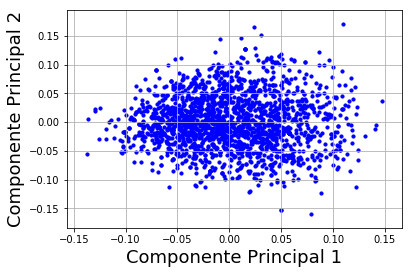

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 18)
ax.set_ylabel('Componente Principal 2', fontsize = 18)

ax.scatter(dataset_2D[:,0], dataset_2D[:,1], c = 'blue', s = 10)
ax.grid()
plt.savefig('pca_2d.eps', format='eps', dpi=90)

# Seleção dos números de clusters para o experimento

In [12]:
range_n_clusters = [7]

# Visualização da silhueta e da clusterização em 2D

For n_clusters = 7 The average silhouette_score is : 0.019648296098674793


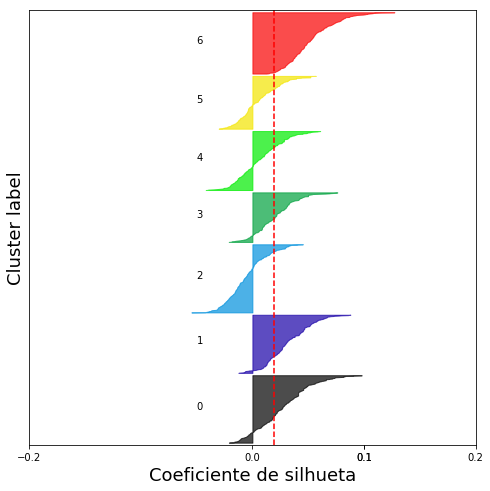

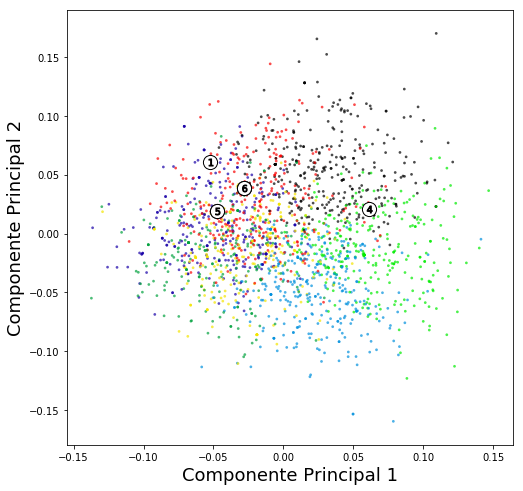

In [13]:
sse = {}
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, n_jobs=4, random_state=10).fit(dataset)
    cluster_labels = clusterer.labels_
    
    sse[n_clusters] = clusterer.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 0.2])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Coeficiente de silhueta", fontsize = 18)
    ax1.set_ylabel("Cluster label", fontsize = 18)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0.1, 0, 0.1, 0.2])
    
    plt.savefig('exp7c.eps', format='eps', dpi=90)
    plt.show()
    
    # Create a subplot with 1 row and 2 columns
    fig2, (ax2) = plt.subplots(1, 1)
    fig2.set_size_inches(8, 8)

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset_2D[:,0], dataset_2D[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    closest, distances = metrics.pairwise_distances_argmin_min(clusterer.cluster_centers_, dataset)

    for i in range(len(closest)):
        ax2.scatter(dataset_2D[closest[i],0], dataset_2D[closest[i],1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        ax2.scatter(dataset_2D[closest[i],0], dataset_2D[closest[i],1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    #ax2.set_title("Visualização da clusterização após aplicação do PCA.")
    ax2.set_xlabel("Componente Principal 1", fontsize = 18)
    ax2.set_ylabel("Componente Principal 2", fontsize = 18)

    plt.savefig('exp7d.eps', format='eps', dpi=90)
    plt.show()

#plt.savefig('exp7.eps', format='eps', dpi=90)
#plt.show()

In [14]:
sse.values()

dict_values([107.95129802650372])